In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# L1 Norm Values of Clean Images

In [1]:
import cv2
import os
import numpy as np

import matplotlib.pyplot as plt
# directory_path = "clean_images"
output_file = "output_results.txt"


''' 
gets average pixel value over whole image
in: image
out: average val 
idea - higher pixel value --> healthier according to histogram
'''
def calculate_l1_norm(image):
    height, width = image.shape
    l1_norm_response = np.sum(np.abs(image))
    l1_norm_response /= (width * height)
    return l1_norm_response
    


''' 
engine of classifier
in- directory path
out- list of l1 vals

'''

def increase_contrast(image, box_size=8, lim = 2):
    '''
    Increase contrast of image
    Input: Image
    Optional: box size and clip limit- can finetune these
    Output: contrast increased image  
    '''
    clahe = cv2.createCLAHE(clipLimit=lim, tileGridSize=(box_size, box_size))
    return clahe.apply(image)

def classify_images(directory_path, threshold=118):
    # tb_image_path = directory_path
    # print(directory_path)
    # tb_image = cv2.imread(tb_image_path)
    # tb_image = cv2.cvtColor(tb_image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale if needed
    l1_vals = []
    correct = 0
    incorrect = 0
    l1_val_tb = []
    l1_val_healthy = []
    for filename in os.listdir(directory_path):
        # print(filename)
        if filename.endswith(".png"):
            image_path = os.path.join(directory_path, filename)
            current_image = cv2.imread(image_path)
            current_image = cv2.cvtColor(current_image, cv2.COLOR_BGR2GRAY)
            new_image = increase_contrast(current_image)
            l1_distance = calculate_l1_norm(new_image)
            
            label = int(filename[-5])
            if label == 1:
                l1_val_tb.append(l1_distance)
            else:
                l1_val_healthy.append(l1_distance)
                
            if l1_distance < threshold:
                predicted_label = 1
            else:
                predicted_label = 0
                
            if predicted_label == label:
                correct +=1
            else:
                incorrect +=1
                
    return l1_vals, correct, incorrect, l1_val_tb, l1_val_healthy

accuracies = {}
thresholds = [100, 105, 110, 115, 120]
directory_path = 'clean_images'
for thresh in thresholds:
    print(thresh)
    l1_vals,correct, incorrect, l1_val_tb, l1_val_healthy = classify_images(directory_path, threshold = thresh)
    accuracies[str(thresh)] = str(correct/(correct+incorrect))



100
105
110
115
120


387 275
Percent Accuracy: 0.5845921450151057


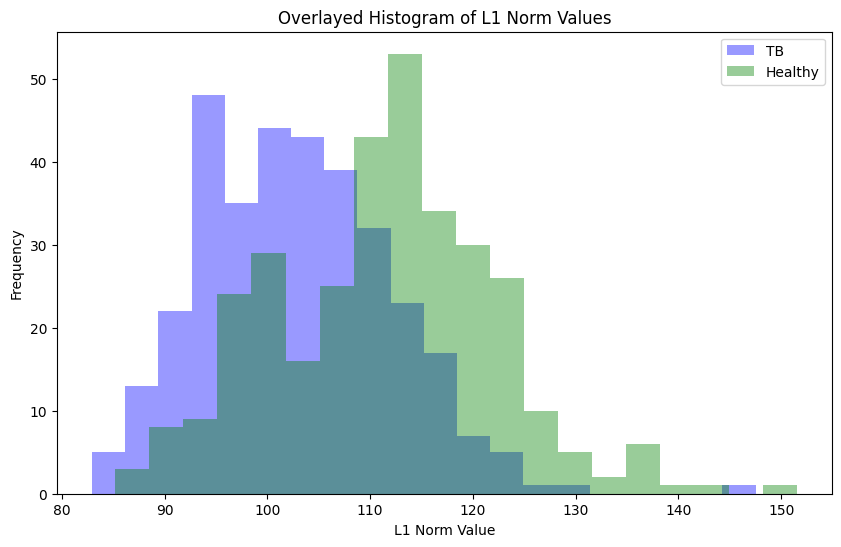

In [2]:
print(correct, incorrect)

print(f'Percent Accuracy: {correct/(correct+incorrect)}')


# Plotting the histograms
plt.figure(figsize=(10, 6))

# Overlaying the histograms
plt.hist(l1_val_tb, bins=20, alpha=0.4, color='blue', label='TB')
plt.hist(l1_val_healthy, bins=20, alpha=0.4, color='green', label='Healthy')

plt.title('Overlayed Histogram of L1 Norm Values')
plt.xlabel('L1 Norm Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

### Plot the accuracies obtained at different thresholds

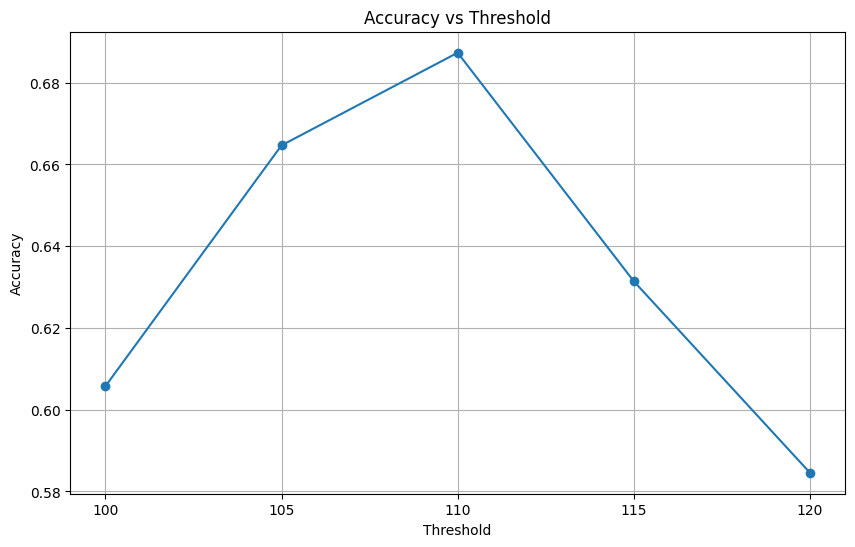

In [3]:

# Convert string keys and values to integers and floats
threshold_values = list(map(int, accuracies.keys()))
accuracy_values = list(map(float, accuracies.values()))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(threshold_values, accuracy_values, marker='o')  # Use 'plt.bar' for a bar plot
plt.title('Accuracy vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.xticks(threshold_values)  # Ensures all threshold values are shown as x-axis ticks
plt.grid(True)
plt.show()

# L1 Norm Values of Raw Images

In [4]:
#this is l1 norm for raw images
import cv2
import os
import numpy as np

import matplotlib.pyplot as plt
# directory_path = "clean_images"
output_file = "output_results.txt"


''' 
gets average pixel value over whole image
in: image
out: average val 
idea - higher pixel value --> healthier according to histogram
'''
def calculate_l1_norm(image):
    height, width = image.shape
    l1_norm_response = np.sum(np.abs(image))
    l1_norm_response /= (width * height)
    return l1_norm_response
    


''' 
engine of classifier
in- directory path
out- list of l1 vals

'''

def increase_contrast(image, box_size=8, lim = 2):
    '''
    Increase contrast of image
    Input: Image
    Optional: box size and clip limit- can finetune these
    Output: contrast increased image  
    '''
    clahe = cv2.createCLAHE(clipLimit=lim, tileGridSize=(box_size, box_size))
    return clahe.apply(image)

def classify_images(directory_path, threshold=118):
    # tb_image_path = directory_path
    # print(directory_path)
    # tb_image = cv2.imread(tb_image_path)
    # tb_image = cv2.cvtColor(tb_image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale if needed
    l1_vals = []
    correct = 0
    incorrect = 0
    l1_val_tb = []
    l1_val_healthy = []
    for filename in os.listdir(directory_path):
        # print(filename)
        if filename.endswith(".png"):
            image_path = os.path.join(directory_path, filename)
            current_image = cv2.imread(image_path)
            current_image = cv2.cvtColor(current_image, cv2.COLOR_BGR2GRAY)
            new_image = increase_contrast(current_image)
            l1_distance = calculate_l1_norm(new_image)
            
            label = int(filename[-5])
            if label == 1:
                l1_val_tb.append(l1_distance)
            else:
                l1_val_healthy.append(l1_distance)
                
            if l1_distance < threshold:
                predicted_label = 1
            else:
                predicted_label = 0
                
            if predicted_label == label:
                correct +=1
            else:
                incorrect +=1
                
    return l1_vals, correct, incorrect, l1_val_tb, l1_val_healthy

accuracies = {}
thresholds = [130,135,140,145,150]
directory_path = 'C:/Caleb/College/UIC/Senior Year/CS 415/Images/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png'
for thresh in thresholds:
    print(thresh)
    l1_vals,correct, incorrect, l1_val_tb, l1_val_healthy = classify_images(directory_path, threshold = thresh)
    accuracies[str(thresh)] = str(correct/(correct+incorrect))



130
135
140
145
150


415 247
Percent Accuracy: 0.6268882175226587


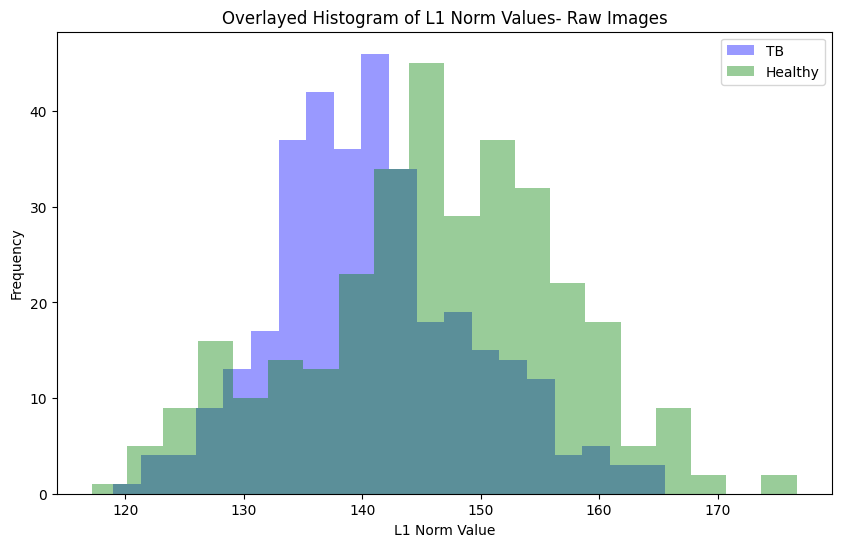

In [5]:
print(correct, incorrect)

print(f'Percent Accuracy: {correct/(correct+incorrect)}')


# Plotting the histograms
plt.figure(figsize=(10, 6))

# Overlaying the histograms
plt.hist(l1_val_tb, bins=20, alpha=0.4, color='blue', label='TB')
plt.hist(l1_val_healthy, bins=20, alpha=0.4, color='green', label='Healthy')

plt.title('Overlayed Histogram of L1 Norm Values- Raw Images')
plt.xlabel('L1 Norm Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

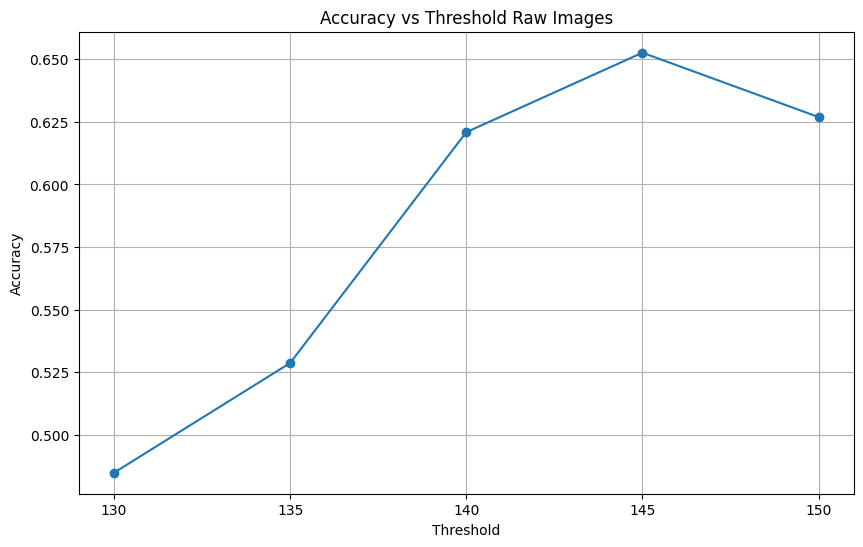

In [6]:

# Convert string keys and values to integers and floats
threshold_values = list(map(int, accuracies.keys()))
accuracy_values = list(map(float, accuracies.values()))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(threshold_values, accuracy_values, marker='o')  # Use 'plt.bar' for a bar plot
plt.title('Accuracy vs Threshold Raw Images')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.xticks(threshold_values)  # Ensures all threshold values are shown as x-axis ticks
plt.grid(True)
plt.show()

# Sift L1 Norm Values Clean Images

In [7]:
import cv2
import os
import concurrent.futures
import numpy as np
import time

def compute_sift(image, n_features):
    try:
        sift = cv2.SIFT_create(nfeatures=n_features)
        kp, des = sift.detectAndCompute(image, None)
        return des if des is not None else []
    except Exception as e:
        print(f"Exception during SIFT computation: {e}")
        return []
    
def increase_contrast(image, box_size=8, lim = 2):
    '''
    Increase contrast of image
    Input: Image
    Optional: box size and clip limit- can finetune these
    Output: contrast increased image  
    '''
    clahe = cv2.createCLAHE(clipLimit=lim, tileGridSize=(box_size, box_size))
    return clahe.apply(image)

def process_image(image_path, n_features=50):
    current_image = cv2.imread(image_path)
    current_image_gray = cv2.cvtColor(current_image, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(current_image_gray, (0, 0), fx=0.5, fy=0.5)
    resized_image = increase_contrast(resized_image)

    block_height, block_width = resized_image.shape[:2]
    block_descriptors = []

    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = []
        for i in range(0, block_height, block_height // 4):
            for j in range(0, block_width, block_width // 4):
                block = resized_image[i:i + block_height // 4, j:j + block_width // 4]
                futures.append(executor.submit(compute_sift, block, n_features))

        for future in concurrent.futures.as_completed(futures):
            result = future.result()
            if result is not None and len(result) > 0:
                block_descriptors.extend(result)

    mean_descriptor = np.mean(block_descriptors, axis=0) if block_descriptors else None
    mean_descriptor_val = np.mean(mean_descriptor) if mean_descriptor is not None else None
    return {
        "image_name": os.path.basename(image_path),
        "label": int(os.path.basename(image_path)[-5]),
        "sift_value": np.mean(mean_descriptor_val),
        "mean_descriptor": mean_descriptor
    }

# Directory containing images
images_directory = "clean_images"

# Measure execution time
start_time = time.time()

image_data_list = []

for filename in os.listdir(images_directory):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(images_directory, filename)
        image_data = process_image(image_path)
        image_data_list.append(image_data)

execution_time = time.time() - start_time
print(f"Total execution time for all images: {execution_time} seconds")

# Example usage of stored data


Total execution time for all images: 323.7039453983307 seconds


In [8]:
def classify_images_with_precomputed_sift(image_data_list, thresholds):
    accuracies = {}
    l1_val_tb = []
    l1_val_healthy = []
    correct = []
    incorrect = []
    
    for thresh in thresholds:
        correct_count = 0
        incorrect_count = 0
        for image_data in image_data_list:
            sift_l1_norm = image_data['sift_value']
            label = image_data['label']
            
            # Your thresholding logic and accuracy calculation here
            if sift_l1_norm is not None and sift_l1_norm < thresh:
                predicted_label = 1
            else:
                predicted_label = 0
                
            if predicted_label == label:
                correct_count += 1
            else:
                incorrect_count += 1
                
            # Store sift values for respective categories
            if label == 1:
                l1_val_tb.append(sift_l1_norm)
            else:
                l1_val_healthy.append(sift_l1_norm)
        
        correct.append(correct_count)
        incorrect.append(incorrect_count)
        
        accuracies[str(thresh)] = correct_count / (correct_count + incorrect_count) if correct_count + incorrect_count > 0 else 0.0
    
    return l1_val_tb, l1_val_healthy, correct, incorrect, accuracies

# Usage example
thresholds = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]

# Assuming image_data_list contains the list of dictionaries with precomputed SIFT values

# Call the function with the precomputed SIFT values
l1_tb, l1_healthy, correct_counts, incorrect_counts, results = classify_images_with_precomputed_sift(image_data_list, thresholds)
print(thresholds)
print("Correct Counts:", correct_counts)
print("Incorrect Counts:", incorrect_counts)
print("Accuracies:", results)


[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
Correct Counts: [326, 326, 326, 323, 309, 307, 347, 331, 336, 336, 336]
Incorrect Counts: [336, 336, 336, 339, 353, 355, 315, 331, 326, 326, 326]
Accuracies: {'18': 0.49244712990936557, '19': 0.49244712990936557, '20': 0.49244712990936557, '21': 0.4879154078549849, '22': 0.46676737160120846, '23': 0.4637462235649547, '24': 0.5241691842900302, '25': 0.5, '26': 0.5075528700906344, '27': 0.5075528700906344, '28': 0.5075528700906344}


415 247
Percent Accuracy: 0.6268882175226587


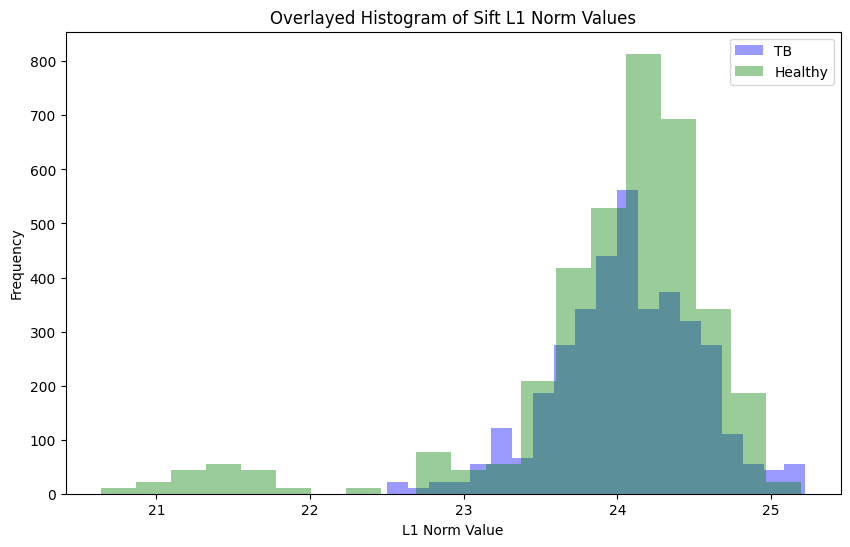

In [9]:
print(correct, incorrect)

print(f'Percent Accuracy: {correct/(correct+incorrect)}')


# Plotting the histograms
plt.figure(figsize=(10, 6))

# Overlaying the histograms
plt.hist(l1_tb, bins=20, alpha=0.4, color='blue', label='TB')
plt.hist(l1_healthy, bins=20, alpha=0.4, color='green', label='Healthy')

plt.title('Overlayed Histogram of Sift L1 Norm Values')
plt.xlabel('L1 Norm Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

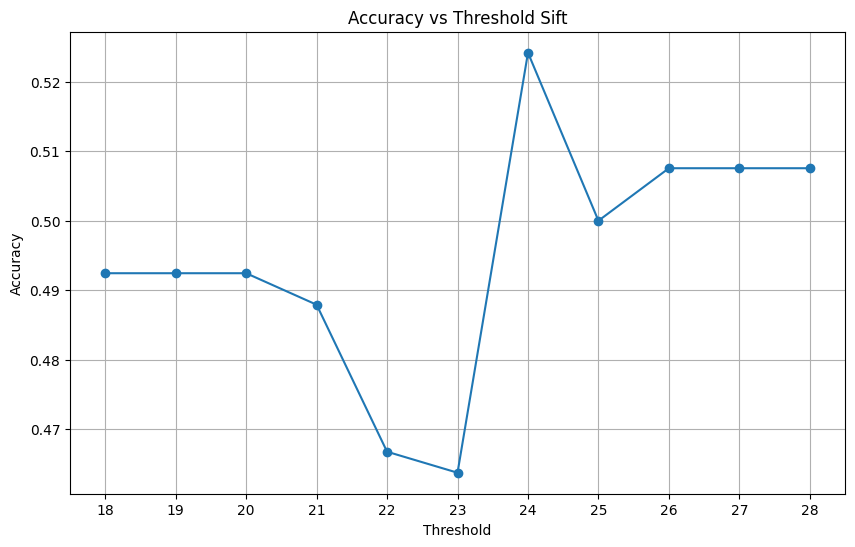

In [10]:

# Convert string keys and values to integers and floats
threshold_values = list(map(int, results.keys()))
accuracy_values = list(map(float, results.values()))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(threshold_values, accuracy_values, marker='o')  # Use 'plt.bar' for a bar plot
plt.title('Accuracy vs Threshold Sift')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.xticks(threshold_values)  # Ensures all threshold values are shown as x-axis ticks
plt.grid(True)
plt.show()

# Raw Images Sift

In [11]:
import cv2
import os
import concurrent.futures
import numpy as np
import time

def compute_sift(image, n_features):
    try:
        sift = cv2.SIFT_create(nfeatures=n_features)
        kp, des = sift.detectAndCompute(image, None)
        return des if des is not None else []
    except Exception as e:
        print(f"Exception during SIFT computation: {e}")
        return []

def process_image(image_path, n_features=50):
    current_image = cv2.imread(image_path)
    current_image_gray = cv2.cvtColor(current_image, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(current_image_gray, (0, 0), fx=0.5, fy=0.5)
    resized_image = increase_contrast(resized_image)
    block_height, block_width = resized_image.shape[:2]
    block_descriptors = []

    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = []
        for i in range(0, block_height, block_height // 4):
            for j in range(0, block_width, block_width // 4):
                block = resized_image[i:i + block_height // 4, j:j + block_width // 4]
                futures.append(executor.submit(compute_sift, block, n_features))

        for future in concurrent.futures.as_completed(futures):
            result = future.result()
            if result is not None and len(result) > 0:
                block_descriptors.extend(result)

    mean_descriptor = np.mean(block_descriptors, axis=0) if block_descriptors else None
    mean_descriptor_val = np.mean(mean_descriptor) if mean_descriptor is not None else None
    return {
        "image_name": os.path.basename(image_path),
        "label": int(os.path.basename(image_path)[-5]),
        "sift_value": np.mean(mean_descriptor_val),
        "mean_descriptor": mean_descriptor
    }

# Directory containing images
images_directory = "C:/Caleb/College/UIC/Senior Year/CS 415/Images/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png"

# Measure execution time
start_time = time.time()

image_data_list = []

for filename in os.listdir(images_directory):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(images_directory, filename)
        image_data = process_image(image_path)
        image_data_list.append(image_data)

execution_time = time.time() - start_time
print(f"Total execution time for all images: {execution_time} seconds")

# Example usage of stored data
print(len(image_data_list))  # Accessing the data of the first image


Total execution time for all images: 271.7458472251892 seconds
662


In [12]:
def classify_images_with_precomputed_sift(image_data_list, thresholds):
    accuracies = {}
    l1_val_tb = []
    l1_val_healthy = []
    correct = []
    incorrect = []
    
    for thresh in thresholds:
        correct_count = 0
        incorrect_count = 0
        for image_data in image_data_list:
            sift_l1_norm = image_data['sift_value']
            label = image_data['label']
            
            # Your thresholding logic and accuracy calculation here
            if sift_l1_norm is not None and sift_l1_norm < thresh:
                predicted_label = 1
            else:
                predicted_label = 0
                
            if predicted_label == label:
                correct_count += 1
            else:
                incorrect_count += 1
                
            # Store sift values for respective categories
            if label == 1:
                l1_val_tb.append(sift_l1_norm)
            else:
                l1_val_healthy.append(sift_l1_norm)
        
        correct.append(correct_count)
        incorrect.append(incorrect_count)
        
        accuracies[str(thresh)] = correct_count / (correct_count + incorrect_count) if correct_count + incorrect_count > 0 else 0.0
    
    return l1_val_tb, l1_val_healthy, correct, incorrect, accuracies

# Usage example
thresholds = [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]

# Assuming image_data_list contains the list of dictionaries with precomputed SIFT values

# Call the function with the precomputed SIFT values
l1_tb, l1_healthy, correct_counts, incorrect_counts, results = classify_images_with_precomputed_sift(image_data_list, thresholds)
print(thresholds)
print("Correct Counts:", correct_counts)
print("Incorrect Counts:", incorrect_counts)
print("Accuracies:", results)


[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
Correct Counts: [326, 326, 326, 326, 326, 326, 326, 326, 301, 306, 336, 336, 336]
Incorrect Counts: [336, 336, 336, 336, 336, 336, 336, 336, 361, 356, 326, 326, 326]
Accuracies: {'16': 0.49244712990936557, '17': 0.49244712990936557, '18': 0.49244712990936557, '19': 0.49244712990936557, '20': 0.49244712990936557, '21': 0.49244712990936557, '22': 0.49244712990936557, '23': 0.49244712990936557, '24': 0.45468277945619334, '25': 0.4622356495468278, '26': 0.5075528700906344, '27': 0.5075528700906344, '28': 0.5075528700906344}


415 247
Percent Accuracy: 0.6268882175226587


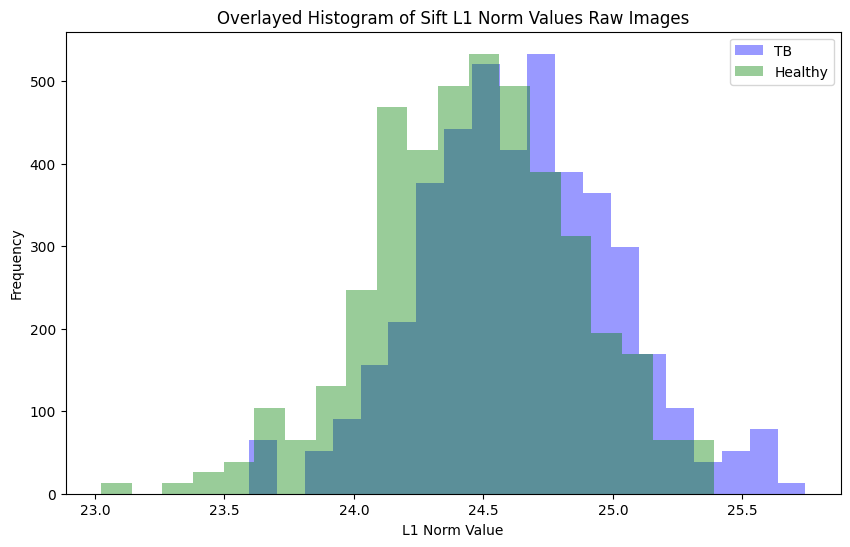

In [13]:
print(correct, incorrect)

print(f'Percent Accuracy: {correct/(correct+incorrect)}')


# Plotting the histograms
plt.figure(figsize=(10, 6))

# Overlaying the histograms
plt.hist(l1_tb, bins=20, alpha=0.4, color='blue', label='TB')
plt.hist(l1_healthy, bins=20, alpha=0.4, color='green', label='Healthy')

plt.title('Overlayed Histogram of Sift L1 Norm Values Raw Images')
plt.xlabel('L1 Norm Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

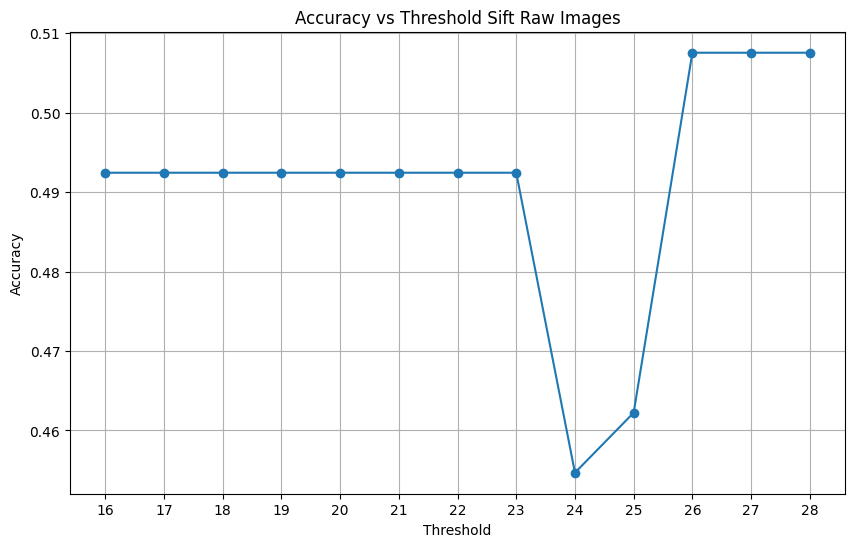

In [14]:

# Convert string keys and values to integers and floats
threshold_values = list(map(int, results.keys()))
accuracy_values = list(map(float, results.values()))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(threshold_values, accuracy_values, marker='o')  # Use 'plt.bar' for a bar plot
plt.title('Accuracy vs Threshold Sift Raw Images')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.xticks(threshold_values)  # Ensures all threshold values are shown as x-axis ticks
plt.grid(True)
plt.show()

#### b) blurring + contrast 
#### c) contrast 
#### d) no preprocessing. 
If you also did the same analysis using the images w no padding (raw images), you could obtain the same metrics. You would just have to change the file path to the directory. The code for the blurring is in Dev's notebook on github
Do Padded and UnPadded for each of these

# Blurring + Contrast

In [129]:
import cv2
import os
import concurrent.futures
import numpy as np
import time

def calculate_l1_norm(image):
    height, width = image.shape
    l1_norm_response = np.sum(np.abs(image))
    l1_norm_response /= (width * height)
    return l1_norm_response

def blur_contrast(image):
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    
    # Convert to grayscale if the image is in color
    if len(blurred_image.shape) > 2:
        blurred_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)
    
    # Ensure the image is in the correct format for CLAHE
    if blurred_image.dtype != 'uint8':
        blurred_image = cv2.convertScaleAbs(blurred_image)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(blurred_image)

def process_image(image_path, n_features=50):
    current_image = cv2.imread(image_path)
    image_bc = blur_contrast(current_image)
    l1_norm = calculate_l1_norm(image_bc)
    
    return {
        "image_name": os.path.basename(image_path),
        "label": int(os.path.basename(image_path)[-5]),
        "l1_norm": l1_norm,
    }

# Directory containing images
images_directory = "C:/Caleb/College/UIC/Senior Year/CS 415/Images/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png"

# Measure execution time
start_time = time.time()

image_data_list_bc_raw = []

for filename in os.listdir(images_directory):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(images_directory, filename)
        image_data = process_image(image_path)
        image_data_list_bc_raw.append(image_data)


# Example usage of stored data
print(len(image_data_list_bc_raw))  # Accessing the data of the first image


662


In [133]:
def classify_images_with_precomputed_l1(image_data_list, thresholds):
    accuracies = {}
    l1_val_tb = []
    l1_val_healthy = []
    correct = []
    incorrect = []
    
    for thresh in thresholds:
        correct_count = 0
        incorrect_count = 0
        for image_data in image_data_list:
            sift_l1_norm = image_data['l1_norm']
            label = image_data['label']
            
            # Your thresholding logic and accuracy calculation here
            if sift_l1_norm is not None and sift_l1_norm < thresh:
                predicted_label = 1
            else:
                predicted_label = 0
                
            if predicted_label == label:
                correct_count += 1
            else:
                incorrect_count += 1
                
            # Store sift values for respective categories
            if label == 1:
                l1_val_tb.append(sift_l1_norm)
            else:
                l1_val_healthy.append(sift_l1_norm)
        
        correct.append(correct_count)
        incorrect.append(incorrect_count)
        
        accuracies[str(thresh)] = correct_count / (correct_count + incorrect_count) if correct_count + incorrect_count > 0 else 0.0
    
    return l1_val_tb, l1_val_healthy, correct, incorrect, accuracies

# Usage example
thresholds = list(range(142,148))


# Assuming image_data_list contains the list of dictionaries with precomputed SIFT values

# Call the function with the precomputed SIFT values
l1_tb, l1_healthy, correct_counts, incorrect_counts, results_bc_raw = classify_images_with_precomputed_l1(image_data_list_bc_raw, thresholds)
print(thresholds)
print("Correct Counts:", correct_counts)
print("Incorrect Counts:", incorrect_counts)
print("Accuracies:", results)


[142, 143, 144, 145, 146, 147]
Correct Counts: [422, 430, 427, 430, 427, 425]
Incorrect Counts: [240, 232, 235, 232, 235, 237]
Accuracies: {'130': 0.48036253776435045, '131': 0.48338368580060426, '132': 0.486404833836858, '133': 0.4954682779456193, '134': 0.5, '135': 0.5060422960725075, '136': 0.5377643504531722, '137': 0.554380664652568, '138': 0.5755287009063444, '139': 0.5996978851963746, '140': 0.6117824773413897, '141': 0.6268882175226587, '142': 0.6374622356495468, '143': 0.649546827794562, '144': 0.6450151057401813, '145': 0.649546827794562, '146': 0.6450151057401813, '147': 0.6419939577039275, '148': 0.620845921450151, '149': 0.620845921450151, '150': 0.622356495468278, '151': 0.622356495468278, '152': 0.5981873111782477, '153': 0.5921450151057401, '154': 0.5906344410876133, '155': 0.5830815709969789, '156': 0.5740181268882175, '157': 0.5709969788519638, '158': 0.5558912386706949, '159': 0.5513595166163142, '160': 0.5453172205438066, '161': 0.5362537764350453, '162': 0.53323262

415 247
Percent Accuracy: 0.6268882175226587


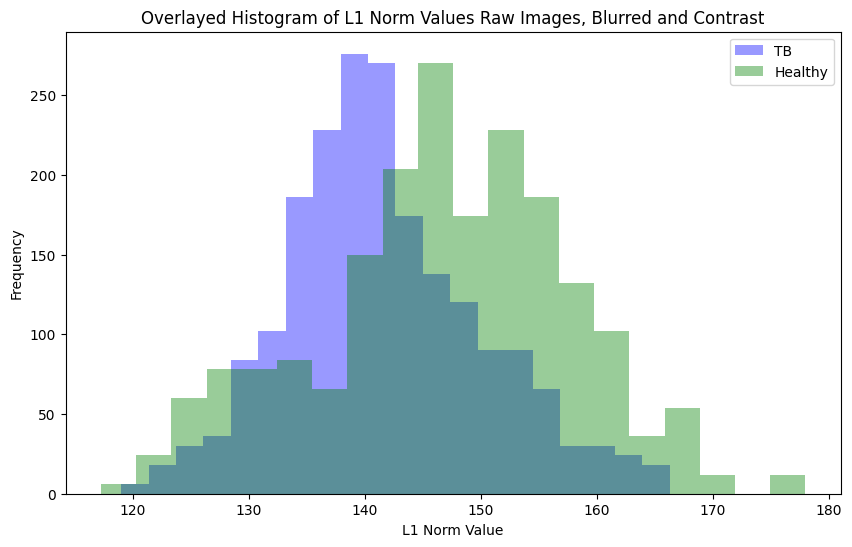

In [134]:
print(correct, incorrect)

print(f'Percent Accuracy: {correct/(correct+incorrect)}')


# Plotting the histograms
plt.figure(figsize=(10, 6))

# Overlaying the histograms
plt.hist(l1_tb, bins=20, alpha=0.4, color='blue', label='TB')
plt.hist(l1_healthy, bins=20, alpha=0.4, color='green', label='Healthy')

plt.title('Overlayed Histogram of L1 Norm Values Raw Images, Blurred and Contrast')
plt.xlabel('L1 Norm Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

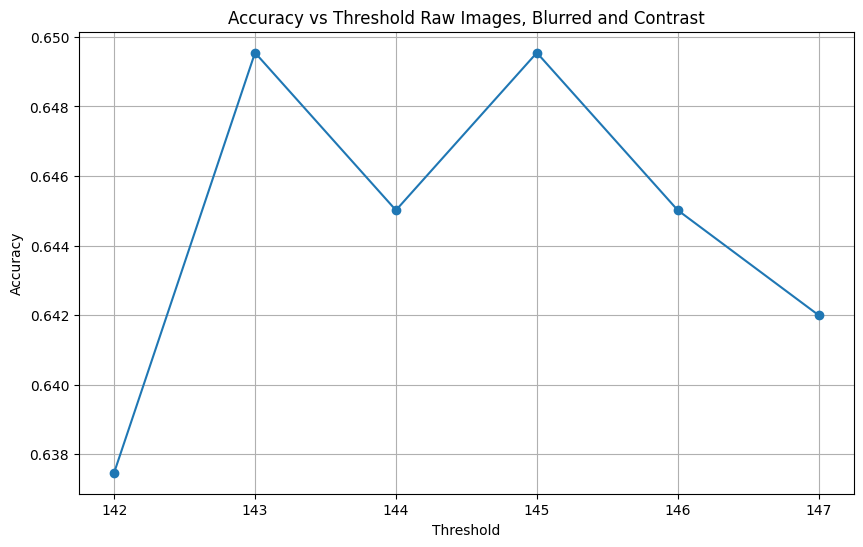

In [135]:

# Convert string keys and values to integers and floats
threshold_values = list(map(int, results_bc_raw.keys()))
accuracy_values = list(map(float, results_bc_raw.values()))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(threshold_values, accuracy_values, marker='o')  # Use 'plt.bar' for a bar plot
plt.title('Accuracy vs Threshold Raw Images, Blurred and Contrast')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.xticks(threshold_values)  # Ensures all threshold values are shown as x-axis ticks
plt.grid(True)
plt.show()

In [136]:
import cv2
import os
import concurrent.futures
import numpy as np
import time

def calculate_l1_norm(image):
    height, width = image.shape
    l1_norm_response = np.sum(np.abs(image))
    l1_norm_response /= (width * height)
    return l1_norm_response

def blur_contrast(image):
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    
    # Convert to grayscale if the image is in color
    if len(blurred_image.shape) > 2:
        blurred_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)
    
    # Ensure the image is in the correct format for CLAHE
    if blurred_image.dtype != 'uint8':
        blurred_image = cv2.convertScaleAbs(blurred_image)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(blurred_image)

def process_image(image_path, n_features=50):
    current_image = cv2.imread(image_path)
    image_bc = blur_contrast(current_image)
    l1_norm = calculate_l1_norm(image_bc)
    
    return {
        "image_name": os.path.basename(image_path),
        "label": int(os.path.basename(image_path)[-5]),
        "l1_norm": l1_norm,
    }

# Directory containing images
images_directory = "clean_images"

# Measure execution time
start_time = time.time()

image_data_list_bc_clean = []

for filename in os.listdir(images_directory):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(images_directory, filename)
        image_data = process_image(image_path)
        image_data_list_bc_clean.append(image_data)


# Example usage of stored data
print(len(image_data_list_bc_clean))  # Accessing the data of the first image


662


In [137]:
def classify_images_with_precomputed_l1(image_data_list, thresholds):
    accuracies = {}
    l1_val_tb = []
    l1_val_healthy = []
    correct = []
    incorrect = []
    
    for thresh in thresholds:
        correct_count = 0
        incorrect_count = 0
        for image_data in image_data_list:
            sift_l1_norm = image_data['l1_norm']
            label = image_data['label']
            
            # Your thresholding logic and accuracy calculation here
            if sift_l1_norm is not None and sift_l1_norm < thresh:
                predicted_label = 1
            else:
                predicted_label = 0
                
            if predicted_label == label:
                correct_count += 1
            else:
                incorrect_count += 1
                
            # Store sift values for respective categories
            if label == 1:
                l1_val_tb.append(sift_l1_norm)
            else:
                l1_val_healthy.append(sift_l1_norm)
        
        correct.append(correct_count)
        incorrect.append(incorrect_count)
        
        accuracies[str(thresh)] = correct_count / (correct_count + incorrect_count) if correct_count + incorrect_count > 0 else 0.0
    
    return l1_val_tb, l1_val_healthy, correct, incorrect, accuracies

# Usage example
thresholds = list(range(105, 111))

# Assuming image_data_list contains the list of dictionaries with precomputed SIFT values

# Call the function with the precomputed SIFT values
l1_tb, l1_healthy, correct_counts, incorrect_counts, results_bc_clean = classify_images_with_precomputed_l1(image_data_list_bc_clean, thresholds)
print(thresholds)
print("Correct Counts:", correct_counts)
print("Incorrect Counts:", incorrect_counts)
print("Accuracies:", results_bc_clean)


[105, 106, 107, 108, 109, 110]
Correct Counts: [437, 449, 450, 452, 456, 455]
Incorrect Counts: [225, 213, 212, 210, 206, 207]
Accuracies: {'105': 0.6601208459214502, '106': 0.6782477341389728, '107': 0.6797583081570997, '108': 0.6827794561933535, '109': 0.6888217522658611, '110': 0.6873111782477341}


415 247
Percent Accuracy: 0.6268882175226587


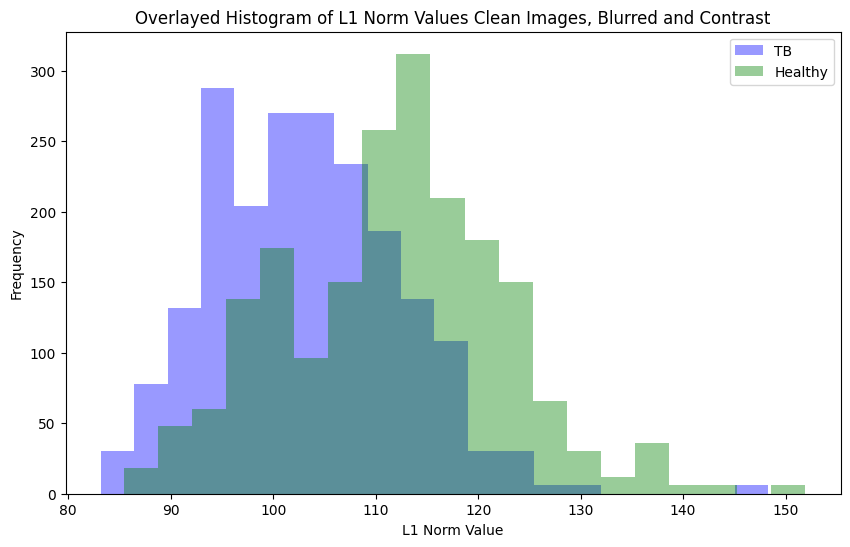

In [138]:
print(correct, incorrect)

print(f'Percent Accuracy: {correct/(correct+incorrect)}')


# Plotting the histograms
plt.figure(figsize=(10, 6))

# Overlaying the histograms
plt.hist(l1_tb, bins=20, alpha=0.4, color='blue', label='TB')
plt.hist(l1_healthy, bins=20, alpha=0.4, color='green', label='Healthy')

plt.title('Overlayed Histogram of L1 Norm Values Clean Images, Blurred and Contrast')
plt.xlabel('L1 Norm Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

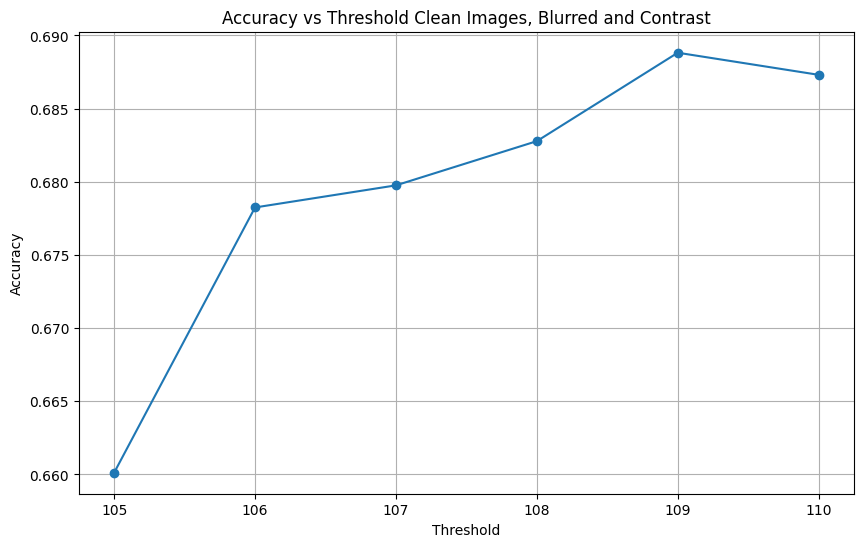

In [139]:

# Convert string keys and values to integers and floats
threshold_values = list(map(int, results_bc_clean.keys()))
accuracy_values = list(map(float, results_bc_clean.values()))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(threshold_values, accuracy_values, marker='o')  # Use 'plt.bar' for a bar plot
plt.title('Accuracy vs Threshold Clean Images, Blurred and Contrast')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.xticks(threshold_values)  # Ensures all threshold values are shown as x-axis ticks
plt.grid(True)
plt.show()

# Contrast

In [140]:
import cv2
import os
import concurrent.futures
import numpy as np
import time

def calculate_l1_norm(image):
    height, width = image.shape
    l1_norm_response = np.sum(np.abs(image))
    l1_norm_response /= (width * height)
    return l1_norm_response

def increase_contrast(image, box_size=8, lim=2):
    """
    Increase contrast of image
    Input: Image
    Optional: box size and clip limit- can finetune these
    Output: contrast increased image  
    """
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Ensure the image is in the correct format for CLAHE
    if image.dtype != 'uint8':
        image = cv2.convertScaleAbs(image)

    clahe = cv2.createCLAHE(clipLimit=lim, tileGridSize=(box_size, box_size))
    return clahe.apply(image)


def process_image(image_path, n_features=50):
    current_image = cv2.imread(image_path)
    image_bc = increase_contrast(current_image)
    l1_norm = calculate_l1_norm(image_bc)
    
    return {
        "image_name": os.path.basename(image_path),
        "label": int(os.path.basename(image_path)[-5]),
        "l1_norm": l1_norm,
    }

# Directory containing images
images_directory = "C:/Caleb/College/UIC/Senior Year/CS 415/Images/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png"

# Measure execution time
start_time = time.time()

image_data_list_c_raw = []

for filename in os.listdir(images_directory):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(images_directory, filename)
        image_data = process_image(image_path)
        image_data_list_c_raw.append(image_data)


# Example usage of stored data
print(len(image_data_list_c_raw))  # Accessing the data of the first image


662


In [141]:
def classify_images_with_precomputed_l1(image_data_list, thresholds):
    accuracies = {}
    l1_val_tb = []
    l1_val_healthy = []
    correct = []
    incorrect = []
    
    for thresh in thresholds:
        correct_count = 0
        incorrect_count = 0
        for image_data in image_data_list:
            sift_l1_norm = image_data['l1_norm']
            label = image_data['label']
            
            # Your thresholding logic and accuracy calculation here
            if sift_l1_norm is not None and sift_l1_norm < thresh:
                predicted_label = 1
            else:
                predicted_label = 0
                
            if predicted_label == label:
                correct_count += 1
            else:
                incorrect_count += 1
                
            # Store sift values for respective categories
            if label == 1:
                l1_val_tb.append(sift_l1_norm)
            else:
                l1_val_healthy.append(sift_l1_norm)
        
        correct.append(correct_count)
        incorrect.append(incorrect_count)
        
        accuracies[str(thresh)] = correct_count / (correct_count + incorrect_count) if correct_count + incorrect_count > 0 else 0.0
    
    return l1_val_tb, l1_val_healthy, correct, incorrect, accuracies

# Usage example
thresholds = list(range(142, 146))

# Assuming image_data_list contains the list of dictionaries with precomputed SIFT values

# Call the function with the precomputed SIFT values
l1_tb, l1_healthy, correct_counts, incorrect_counts, results_c_raw = classify_images_with_precomputed_l1(image_data_list_c_raw, thresholds)
print(thresholds)
print("Correct Counts:", correct_counts)
print("Incorrect Counts:", incorrect_counts)
print("Accuracies:", results_c_raw)


[142, 143, 144, 145]
Correct Counts: [431, 430, 434, 432]
Incorrect Counts: [231, 232, 228, 230]
Accuracies: {'142': 0.6510574018126888, '143': 0.649546827794562, '144': 0.6555891238670695, '145': 0.6525679758308157}


415 247
Percent Accuracy: 0.6268882175226587


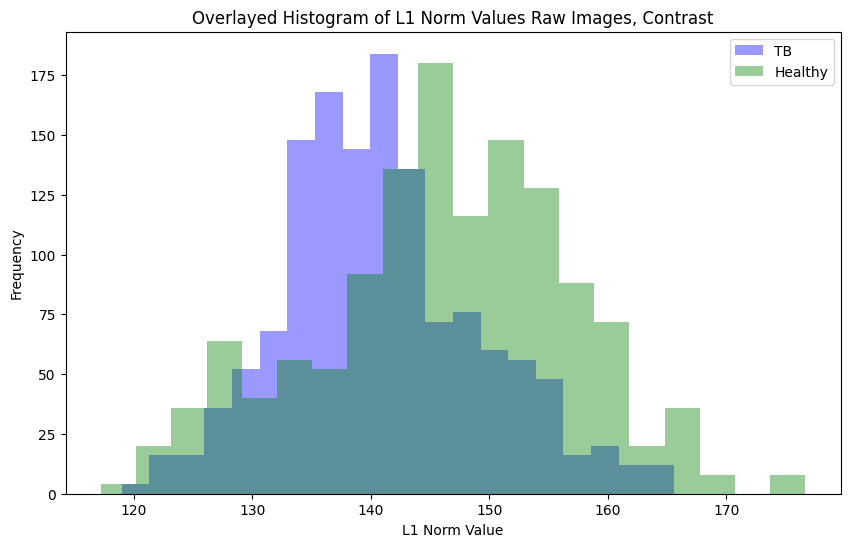

In [142]:
print(correct, incorrect)

print(f'Percent Accuracy: {correct/(correct+incorrect)}')


# Plotting the histograms
plt.figure(figsize=(10, 6))

# Overlaying the histograms
plt.hist(l1_tb, bins=20, alpha=0.4, color='blue', label='TB')
plt.hist(l1_healthy, bins=20, alpha=0.4, color='green', label='Healthy')

plt.title('Overlayed Histogram of L1 Norm Values Raw Images, Contrast')
plt.xlabel('L1 Norm Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

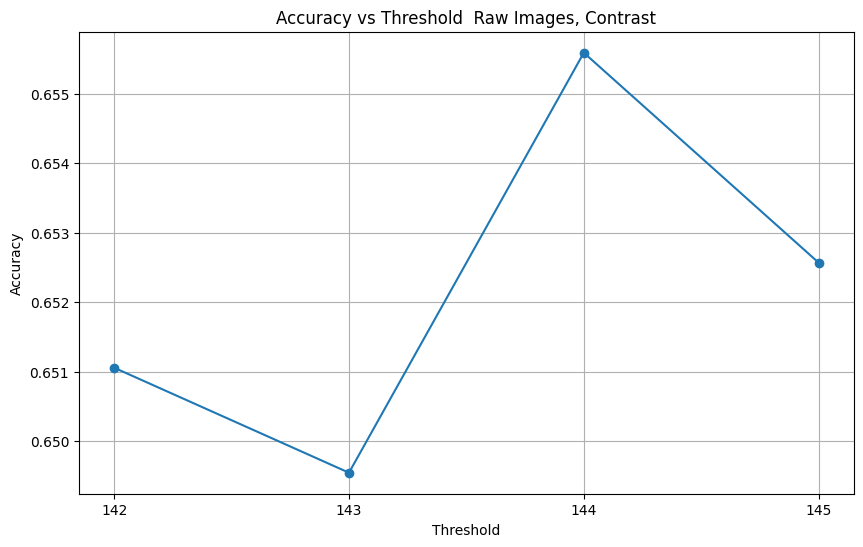

In [143]:

# Convert string keys and values to integers and floats
threshold_values = list(map(int, results_c_raw.keys()))
accuracy_values = list(map(float, results_c_raw.values()))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(threshold_values, accuracy_values, marker='o')  # Use 'plt.bar' for a bar plot
plt.title('Accuracy vs Threshold  Raw Images, Contrast')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.xticks(threshold_values)  # Ensures all threshold values are shown as x-axis ticks
plt.grid(True)
plt.show()

In [144]:
import cv2
import os
import concurrent.futures
import numpy as np
import time

def calculate_l1_norm(image):
    height, width = image.shape
    l1_norm_response = np.sum(np.abs(image))
    l1_norm_response /= (width * height)
    return l1_norm_response

def increase_contrast(image, box_size=8, lim=2):
    """
    Increase contrast of image
    Input: Image
    Optional: box size and clip limit- can finetune these
    Output: contrast increased image  
    """
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Ensure the image is in the correct format for CLAHE
    if image.dtype != 'uint8':
        image = cv2.convertScaleAbs(image)

    clahe = cv2.createCLAHE(clipLimit=lim, tileGridSize=(box_size, box_size))
    return clahe.apply(image)


def process_image(image_path, n_features=50):
    current_image = cv2.imread(image_path)
    image_bc = increase_contrast(current_image)
    l1_norm = calculate_l1_norm(image_bc)
    
    return {
        "image_name": os.path.basename(image_path),
        "label": int(os.path.basename(image_path)[-5]),
        "l1_norm": l1_norm,
    }

# Directory containing images
images_directory = "clean_images"

# Measure execution time
start_time = time.time()

image_data_list_c_clean = []

for filename in os.listdir(images_directory):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(images_directory, filename)
        image_data = process_image(image_path)
        image_data_list_c_clean.append(image_data)


# Example usage of stored data
print(len(image_data_list_c_clean))  # Accessing the data of the first image


662


In [145]:
def classify_images_with_precomputed_l1(image_data_list, thresholds):
    accuracies = {}
    l1_val_tb = []
    l1_val_healthy = []
    correct = []
    incorrect = []
    
    for thresh in thresholds:
        correct_count = 0
        incorrect_count = 0
        for image_data in image_data_list:
            sift_l1_norm = image_data['l1_norm']
            label = image_data['label']
            
            # Your thresholding logic and accuracy calculation here
            if sift_l1_norm is not None and sift_l1_norm < thresh:
                predicted_label = 1
            else:
                predicted_label = 0
                
            if predicted_label == label:
                correct_count += 1
            else:
                incorrect_count += 1
                
            # Store sift values for respective categories
            if label == 1:
                l1_val_tb.append(sift_l1_norm)
            else:
                l1_val_healthy.append(sift_l1_norm)
        
        correct.append(correct_count)
        incorrect.append(incorrect_count)
        
        accuracies[str(thresh)] = correct_count / (correct_count + incorrect_count) if correct_count + incorrect_count > 0 else 0.0
    
    return l1_val_tb, l1_val_healthy, correct, incorrect, accuracies

# Usage example
thresholds = list(range(106, 112))


# Assuming image_data_list contains the list of dictionaries with precomputed SIFT values

# Call the function with the precomputed SIFT values
l1_tb, l1_healthy, correct_counts, incorrect_counts, results_c_clean = classify_images_with_precomputed_l1(image_data_list_c_clean, thresholds)
print(thresholds)
print("Correct Counts:", correct_counts)
print("Incorrect Counts:", incorrect_counts)
print("Accuracies:", results)


[106, 107, 108, 109, 110, 111]
Correct Counts: [453, 453, 454, 458, 455, 450]
Incorrect Counts: [209, 209, 208, 204, 207, 212]
Accuracies: {'130': 0.48036253776435045, '131': 0.48338368580060426, '132': 0.486404833836858, '133': 0.4954682779456193, '134': 0.5, '135': 0.5060422960725075, '136': 0.5377643504531722, '137': 0.554380664652568, '138': 0.5755287009063444, '139': 0.5996978851963746, '140': 0.6117824773413897, '141': 0.6268882175226587, '142': 0.6374622356495468, '143': 0.649546827794562, '144': 0.6450151057401813, '145': 0.649546827794562, '146': 0.6450151057401813, '147': 0.6419939577039275, '148': 0.620845921450151, '149': 0.620845921450151, '150': 0.622356495468278, '151': 0.622356495468278, '152': 0.5981873111782477, '153': 0.5921450151057401, '154': 0.5906344410876133, '155': 0.5830815709969789, '156': 0.5740181268882175, '157': 0.5709969788519638, '158': 0.5558912386706949, '159': 0.5513595166163142, '160': 0.5453172205438066, '161': 0.5362537764350453, '162': 0.53323262

415 247
Percent Accuracy: 0.6268882175226587


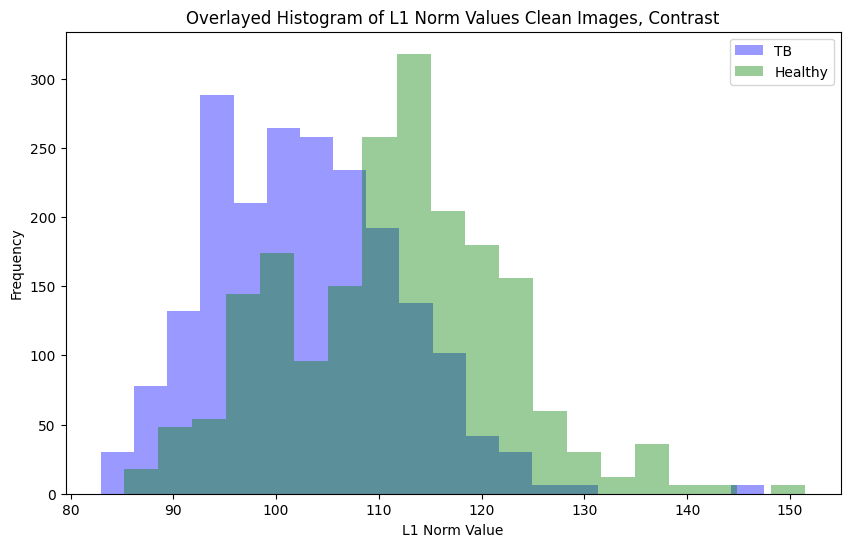

In [146]:
print(correct, incorrect)

print(f'Percent Accuracy: {correct/(correct+incorrect)}')


# Plotting the histograms
plt.figure(figsize=(10, 6))

# Overlaying the histograms
plt.hist(l1_tb, bins=20, alpha=0.4, color='blue', label='TB')
plt.hist(l1_healthy, bins=20, alpha=0.4, color='green', label='Healthy')

plt.title('Overlayed Histogram of L1 Norm Values Clean Images, Contrast')
plt.xlabel('L1 Norm Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

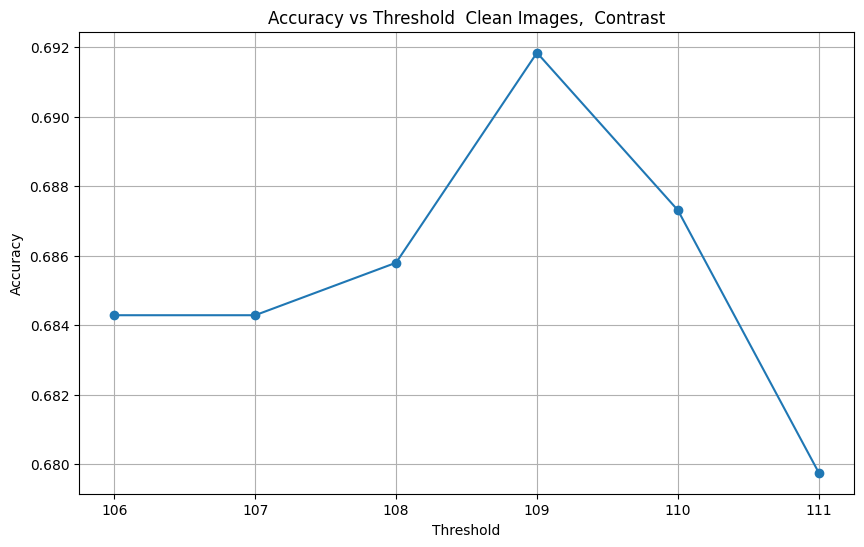

In [147]:

# Convert string keys and values to integers and floats
threshold_values = list(map(int, results_c_clean.keys()))
accuracy_values = list(map(float, results_c_clean.values()))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(threshold_values, accuracy_values, marker='o')  # Use 'plt.bar' for a bar plot
plt.title('Accuracy vs Threshold  Clean Images,  Contrast')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.xticks(threshold_values)  # Ensures all threshold values are shown as x-axis ticks
plt.grid(True)
plt.show()

# No Processing

In [148]:
import cv2
import os
import concurrent.futures
import numpy as np
import time

def calculate_l1_norm(image):
    if len(image.shape) > 2:  # For colored images (3 dimensions)
        height, width, channels = image.shape
    else:  # For grayscale images (2 dimensions)
        height, width = image.shape
        channels = 1

    l1_norm_response = np.sum(np.abs(image))
    l1_norm_response /= (width * height * channels)  # Consider channels in calculation

    return l1_norm_response


def process_image(image_path):
    current_image = cv2.imread(image_path)
    l1_norm = calculate_l1_norm(current_image)
    
    return {
        "image_name": os.path.basename(image_path),
        "label": int(os.path.basename(image_path)[-5]),
        "l1_norm": l1_norm,
    }

# Directory containing images
images_directory = "C:/Caleb/College/UIC/Senior Year/CS 415/Images/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png"

# Measure execution time
start_time = time.time()

image_data_list_np_raw = []

for filename in os.listdir(images_directory):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(images_directory, filename)
        image_data = process_image(image_path)
        image_data_list_np_raw.append(image_data)


# Example usage of stored data
print(len(image_data_list_np_raw))  # Accessing the data of the first image


662


In [149]:
def classify_images_with_precomputed_l1(image_data_list, thresholds):
    accuracies = {}
    l1_val_tb = []
    l1_val_healthy = []
    correct = []
    incorrect = []
    
    for thresh in thresholds:
        correct_count = 0
        incorrect_count = 0
        for image_data in image_data_list:
            sift_l1_norm = image_data['l1_norm']
            label = image_data['label']
            
            # Your thresholding logic and accuracy calculation here
            if sift_l1_norm is not None and sift_l1_norm < thresh:
                predicted_label = 1
            else:
                predicted_label = 0
                
            if predicted_label == label:
                correct_count += 1
            else:
                incorrect_count += 1
                
            # Store sift values for respective categories
            if label == 1:
                l1_val_tb.append(sift_l1_norm)
            else:
                l1_val_healthy.append(sift_l1_norm)
        
        correct.append(correct_count)
        incorrect.append(incorrect_count)
        
        accuracies[str(thresh)] = correct_count / (correct_count + incorrect_count) if correct_count + incorrect_count > 0 else 0.0
    
    return l1_val_tb, l1_val_healthy, correct, incorrect, accuracies

# Usage example
thresholds = list(range(0, 5))


# Assuming image_data_list contains the list of dictionaries with precomputed SIFT values

# Call the function with the precomputed SIFT values
l1_tb, l1_healthy, correct_counts, incorrect_counts, results_np_raw = classify_images_with_precomputed_l1(image_data_list_np_raw, thresholds)
print(thresholds)
print("Correct Counts:", correct_counts)
print("Incorrect Counts:", incorrect_counts)
print("Accuracies:", results_np_raw)


[0, 1, 2, 3, 4]
Correct Counts: [326, 322, 315, 307, 303]
Incorrect Counts: [336, 340, 347, 355, 359]
Accuracies: {'0': 0.49244712990936557, '1': 0.486404833836858, '2': 0.47583081570996977, '3': 0.4637462235649547, '4': 0.45770392749244715}


415 247
Percent Accuracy: 0.6268882175226587


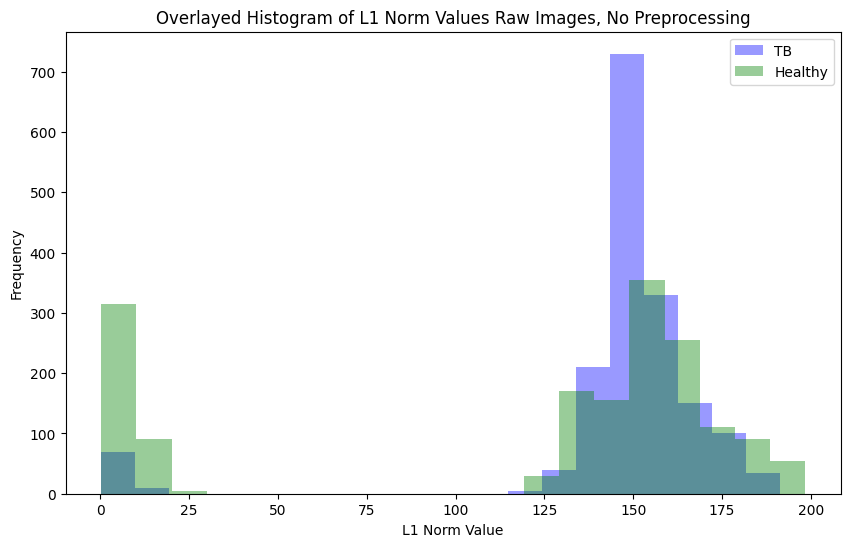

In [150]:
print(correct, incorrect)

print(f'Percent Accuracy: {correct/(correct+incorrect)}')


# Plotting the histograms
plt.figure(figsize=(10, 6))

# Overlaying the histograms
plt.hist(l1_tb, bins=20, alpha=0.4, color='blue', label='TB')
plt.hist(l1_healthy, bins=20, alpha=0.4, color='green', label='Healthy')

plt.title('Overlayed Histogram of L1 Norm Values Raw Images, No Preprocessing')
plt.xlabel('L1 Norm Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

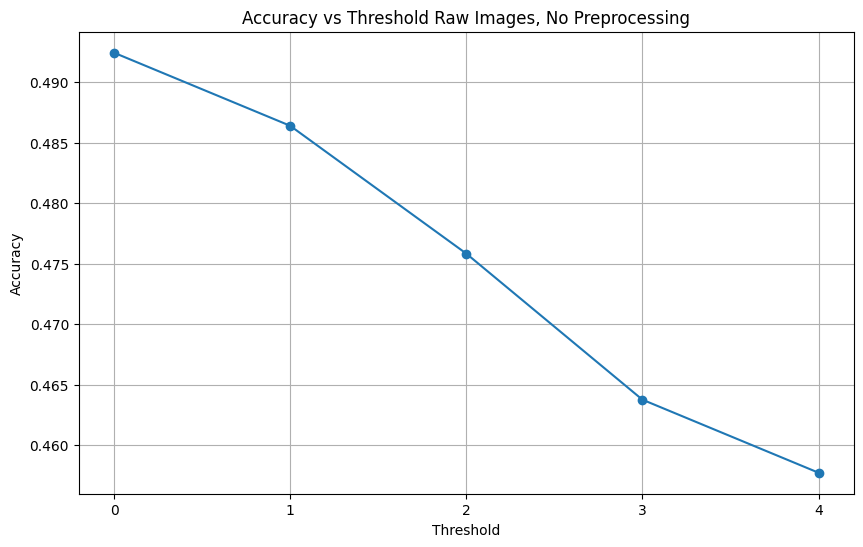

In [151]:

# Convert string keys and values to integers and floats
threshold_values = list(map(int, results_np_raw.keys()))
accuracy_values = list(map(float, results_np_raw.values()))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(threshold_values, accuracy_values, marker='o')  # Use 'plt.bar' for a bar plot
plt.title('Accuracy vs Threshold Raw Images, No Preprocessing')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.xticks(threshold_values)  # Ensures all threshold values are shown as x-axis ticks
plt.grid(True)
plt.show()

In [152]:
import cv2
import os
import concurrent.futures
import numpy as np
import time

def calculate_l1_norm(image):
    if len(image.shape) > 2:  # For colored images (3 dimensions)
        height, width, channels = image.shape
    else:  # For grayscale images (2 dimensions)
        height, width = image.shape
        channels = 1

    l1_norm_response = np.sum(np.abs(image))
    l1_norm_response /= (width * height * channels)  # Consider channels in calculation

    return l1_norm_response


def process_image(image_path):
    current_image = cv2.imread(image_path)
    l1_norm = calculate_l1_norm(current_image)
    
    return {
        "image_name": os.path.basename(image_path),
        "label": int(os.path.basename(image_path)[-5]),
        "l1_norm": l1_norm,
    }

# Directory containing images
images_directory = "clean_images"

# Measure execution time
start_time = time.time()

image_data_list_np_clean = []

for filename in os.listdir(images_directory):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(images_directory, filename)
        image_data = process_image(image_path)
        image_data_list_np_clean.append(image_data)


# Example usage of stored data
print(len(image_data_list_np_clean))  # Accessing the data of the first image


662


In [153]:
def classify_images_with_precomputed_l1(image_data_list, thresholds):
    accuracies = {}
    l1_val_tb = []
    l1_val_healthy = []
    correct = []
    incorrect = []
    
    for thresh in thresholds:
        correct_count = 0
        incorrect_count = 0
        for image_data in image_data_list:
            sift_l1_norm = image_data['l1_norm']
            label = image_data['label']
            
            # Your thresholding logic and accuracy calculation here
            if sift_l1_norm is not None and sift_l1_norm < thresh:
                predicted_label = 1
            else:
                predicted_label = 0
                
            if predicted_label == label:
                correct_count += 1
            else:
                incorrect_count += 1
                
            # Store sift values for respective categories
            if label == 1:
                l1_val_tb.append(sift_l1_norm)
            else:
                l1_val_healthy.append(sift_l1_norm)
        
        correct.append(correct_count)
        incorrect.append(incorrect_count)
        
        accuracies[str(thresh)] = correct_count / (correct_count + incorrect_count) if correct_count + incorrect_count > 0 else 0.0
    
    return l1_val_tb, l1_val_healthy, correct, incorrect, accuracies

# Usage example
thresholds = list(range(0, 10))


# Assuming image_data_list contains the list of dictionaries with precomputed SIFT values

# Call the function with the precomputed SIFT values
l1_tb, l1_healthy, correct_counts, incorrect_counts, results_np_clean = classify_images_with_precomputed_l1(image_data_list_np_clean, thresholds)
print(thresholds)
print("Correct Counts:", correct_counts)
print("Incorrect Counts:", incorrect_counts)
print("Accuracies:", results_np_clean)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Correct Counts: [326, 312, 307, 306, 293, 291, 280, 274, 266, 265]
Incorrect Counts: [336, 350, 355, 356, 369, 371, 382, 388, 396, 397]
Accuracies: {'0': 0.49244712990936557, '1': 0.47129909365558914, '2': 0.4637462235649547, '3': 0.4622356495468278, '4': 0.4425981873111782, '5': 0.4395770392749245, '6': 0.4229607250755287, '7': 0.41389728096676737, '8': 0.40181268882175225, '9': 0.4003021148036254}


415 247
Percent Accuracy: 0.6268882175226587


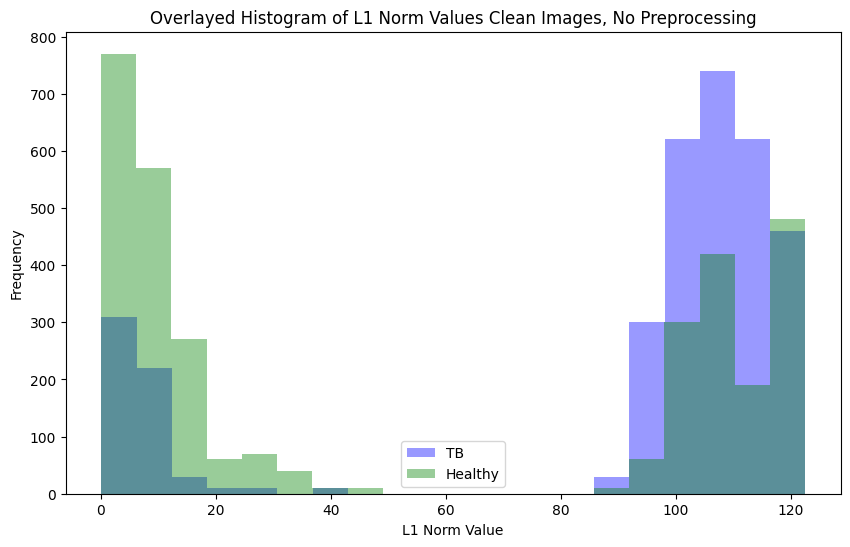

In [154]:
print(correct, incorrect)

print(f'Percent Accuracy: {correct/(correct+incorrect)}')


# Plotting the histograms
plt.figure(figsize=(10, 6))

# Overlaying the histograms
plt.hist(l1_tb, bins=20, alpha=0.4, color='blue', label='TB')
plt.hist(l1_healthy, bins=20, alpha=0.4, color='green', label='Healthy')

plt.title('Overlayed Histogram of L1 Norm Values Clean Images, No Preprocessing')
plt.xlabel('L1 Norm Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

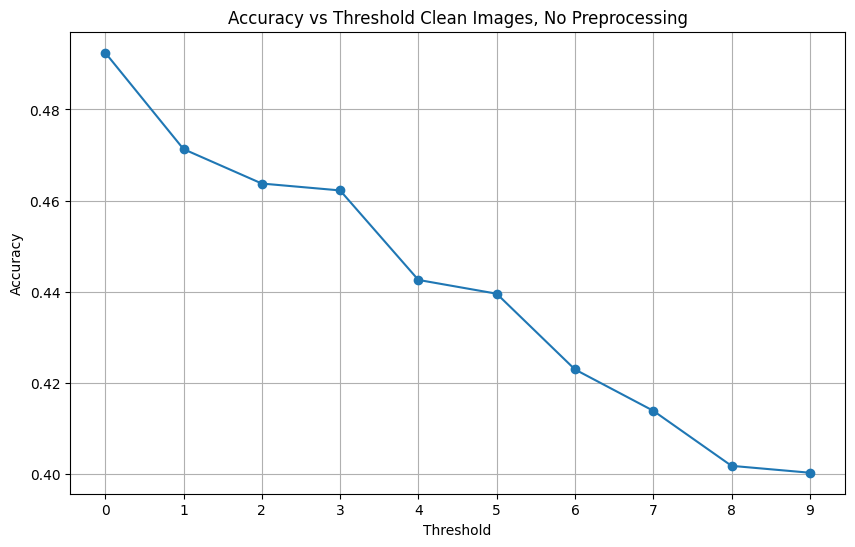

In [155]:

# Convert string keys and values to integers and floats
threshold_values = list(map(int, results_np_clean.keys()))
accuracy_values = list(map(float, results_np_clean.values()))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(threshold_values, accuracy_values, marker='o')  # Use 'plt.bar' for a bar plot
plt.title('Accuracy vs Threshold Clean Images, No Preprocessing')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.xticks(threshold_values)  # Ensures all threshold values are shown as x-axis ticks
plt.grid(True)
plt.show()

In [157]:
print(results_np_clean)
print(results_np_raw)
print(results_bc_clean)
print(results_bc_raw)
print(results_c_clean)
print(results_c_raw)


{'0': 0.49244712990936557, '1': 0.47129909365558914, '2': 0.4637462235649547, '3': 0.4622356495468278, '4': 0.4425981873111782, '5': 0.4395770392749245, '6': 0.4229607250755287, '7': 0.41389728096676737, '8': 0.40181268882175225, '9': 0.4003021148036254}
{'0': 0.49244712990936557, '1': 0.486404833836858, '2': 0.47583081570996977, '3': 0.4637462235649547, '4': 0.45770392749244715}
{'105': 0.6601208459214502, '106': 0.6782477341389728, '107': 0.6797583081570997, '108': 0.6827794561933535, '109': 0.6888217522658611, '110': 0.6873111782477341}
{'142': 0.6374622356495468, '143': 0.649546827794562, '144': 0.6450151057401813, '145': 0.649546827794562, '146': 0.6450151057401813, '147': 0.6419939577039275}
{'106': 0.6842900302114804, '107': 0.6842900302114804, '108': 0.6858006042296072, '109': 0.6918429003021148, '110': 0.6873111782477341, '111': 0.6797583081570997}
{'142': 0.6510574018126888, '143': 0.649546827794562, '144': 0.6555891238670695, '145': 0.6525679758308157}


In [159]:
max_np_clean = max(results_np_clean.items(), key=lambda x: x[1])
max_np_raw = max(results_np_raw.items(), key=lambda x: x[1])
max_bc_clean = max(results_bc_clean.items(), key=lambda x: x[1])
max_bc_raw = max(results_bc_raw.items(), key=lambda x: x[1])
max_c_clean = max(results_c_clean.items(), key=lambda x: x[1])
max_c_raw = max(results_c_raw.items(), key=lambda x: x[1])

# Print the keys and values of the maximums for each dictionary
print("Max values and their keys:")
print(f"results_np_clean: {max_np_clean}")
print(f"results_np_raw: {max_np_raw}")
print(f"results_bc_clean: {max_bc_clean}")
print(f"results_bc_raw: {max_bc_raw}")
print(f"results_c_clean: {max_c_clean}")
print(f"results_c_raw: {max_c_raw}")

Max values and their keys:
results_np_clean: ('0', 0.49244712990936557)
results_np_raw: ('0', 0.49244712990936557)
results_bc_clean: ('109', 0.6888217522658611)
results_bc_raw: ('143', 0.649546827794562)
results_c_clean: ('109', 0.6918429003021148)
results_c_raw: ('144', 0.6555891238670695)


In [162]:
import pandas as pd

data = {
    'results_np_clean': max_np_clean,
    'results_np_raw': max_np_raw,
    'results_bc_clean': max_bc_clean,
    'results_bc_raw': max_bc_raw,
    'results_c_clean': max_c_clean,
    'results_c_raw': max_c_raw,
}

# Create a DataFrame and transpose it to have the keys and values as rows
df = pd.DataFrame(data).T

# Set column names for better representation
df.columns = ['Threshold', 'Max Accuracy']

# Display the DataFrame
print(df)


                 Threshold Max Accuracy
results_np_clean         0     0.492447
results_np_raw           0     0.492447
results_bc_clean       109     0.688822
results_bc_raw         143     0.649547
results_c_clean        109     0.691843
results_c_raw          144     0.655589
